<h2  style="color:Blue;text-align: center" class="list-group-item list-group-item-action active">1. Importing Necessary Libraries </h2><a id = "1"></a>

In [12]:
import re 
import string
# Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

# Algorithmes
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from autocorrect import Speller

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
try:
    from xgboost import XGBClassifier
except:
    !pip install xgboost
    from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
try:
    from mlxtend.plotting import plot_confusion_matrix
except:
    !pip install mlxtend
    from mlxtend.plotting import plot_confusion_matrix
    
from IPython.display import Image
try:
    import stylecloud
except:
    !pip install stylecloud
    import stylecloud

<h2  style="color:Blue;text-align: center" class="list-group-item list-group-item-action active">2. Data Collection </h2><a id = "2"></a>

In [14]:
df = pd.read_csv("all_clean_CovidData.csv")
df.head()

,Text,Label
0,health author monitor new covid outbreak saska...,1
1,coronaviru spread ecuadorian citi quit guayaquil,0
2,need know covid bc april,1
3,one media person report world destruct face de...,1
4,statement come time fastspread covid viru disr...,1


In [15]:
df.shape

(33930, 2)

<h2  style="color:Blue;text-align: center" class="list-group-item list-group-item-action active">5.  Feature Engineering </h2><a id = "5"></a>

In [16]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

exam="covid19 is fatal disease :https://www.kaggle.com/c/nlp-getting-started"
print(remove_URL(exam))

covid19 is fatal disease :


In [17]:
df["Text"]=df["Text"].apply(remove_URL)

In [18]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

exam="""<div>
<h1>'Michigan governor violated social distancing order while signing stay-at-home order.\t\t'</h1>
<a href="https://www.kaggle.com/c/nlp-getting-started">enter</a>
</div>"""
print(remove_html(exam))


'Michigan governor violated social distancing order while signing stay-at-home order.		'
enter



In [19]:
df["Text"]=df["Text"].apply(remove_html)

In [20]:
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

df["Text"]=df["Text"].apply(remove_punc)

In [21]:
tl=PorterStemmer()
stopwords=stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
CustomStopWords=['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y']

In [23]:
spell = Speller(lang='en')

def clean_line(line):
    line =re.sub(r'[^a-zA-Z]',' ',line) 
    line=line.lower()
    line=spell(line)
    line=gensim.utils.simple_preprocess(line, deacc=True)#return list #ignore tokens that are too short or too long
    #line=line.split()
    line=[tl.stem(word) for word in line if word not in CustomStopWords]
    line=" ".join(line)
    return line

In [24]:
x=df["Text"]
y=df['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20, shuffle =True)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((23751,), (10179,), (23751,), (10179,))

In [25]:
my_tfidf = TfidfVectorizer()

# fit the vectorizer and transform X_train into a tf-idf matrix,
# then use the same vectorizer to transform X_test

x_train = my_tfidf.fit_transform(x_train).toarray()
x_test = my_tfidf.transform(x_test).toarray()


<h2  style="color:Blue;text-align: center" class="list-group-item list-group-item-action active">6. Modelling </h2><a id = "6"></a>

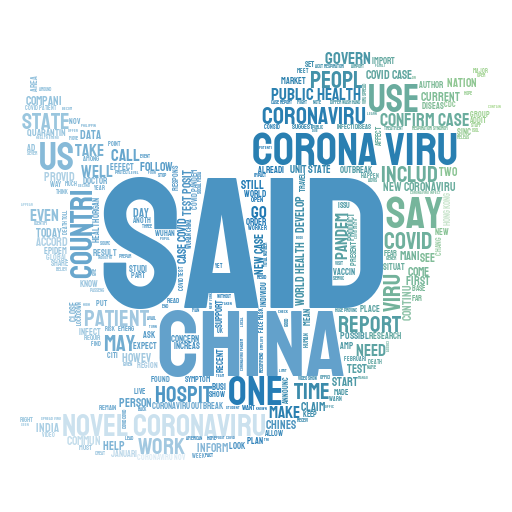

In [26]:
stylecloud.gen_stylecloud(text=" ".join(df['Text']), 
                          icon_name='fab fa-twitter',
                          palette='colorbrewer.qualitative.Paired_3', 
                          background_color='white',
                          gradient='horizontal')
Image('stylecloud.png')

In [34]:
r=RandomForestClassifier()#max_depth=70
r.fit(x_train , y_train)
r.score(x_train , y_train),r.score(x_test , y_test)

(0.999284240663551, 0.8907554769623736)

In [31]:
b=XGBClassifier()
b.fit(x_train , y_train)
b.score(x_train , y_train),b.score(x_test , y_test)

(0.8935202728306176, 0.8529325081049219)

# Test

In [43]:
test=pd.read_csv("collected_test.txt",sep='\t')
test.sample(5)

,Text,Label
10,The Government is using Behavioural Scientists...,0
26,When in indoor public places in areas where th...,1
9,Obesity kills more people than Coronavirus.,0
19,Swabs from your nose or throat are tested to d...,1
15,The virus spreads very easily to other people,1


In [44]:
test.Label.value_counts()

1    16
0    15
Name: Label, dtype: int64

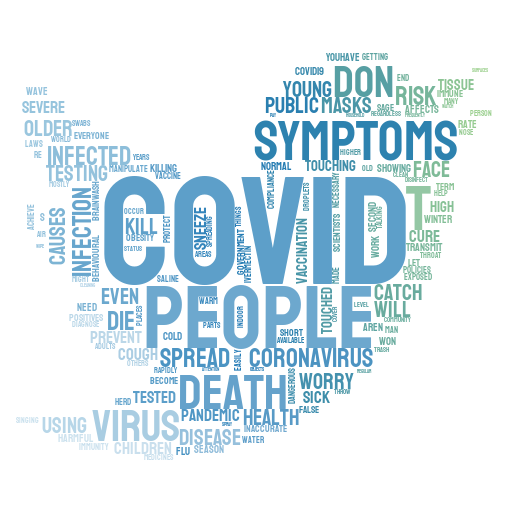

In [37]:
stylecloud.gen_stylecloud(text=" ".join(test['Text']), 
                          icon_name='fab fa-twitter',
                          palette='colorbrewer.qualitative.Paired_3', 
                          background_color='white',
                          gradient='horizontal')
Image('stylecloud.png')

In [45]:
test["Text"]=test["Text"].apply(remove_URL)
test["Text"]=test["Text"].apply(remove_html)
test["Text"]=test["Text"].apply(remove_punc)
test["Text"]=test["Text"].apply(clean_line)


txt = my_tfidf.transform(test["Text"]).toarray()
tes=r.predict(txt)
tes2=b.predict(txt)

In [46]:
test["predicted_tree"]=tes
test["predicted_boost"]=tes2

In [47]:
test

,Text,Label,predicted_tree,predicted_boost
0,covid not kill diseas,0,0,0
1,covid affect older peopl young peopl worri,0,1,0
2,youv covid aren show symptom won transmit diseas,0,0,0
3,face mask work,0,0,0
4,mask harm health kill,0,0,0
5,need worri second wave covid normal winter col...,0,1,0
6,covid death rate peopl catch,0,0,1
7,test inaccur test covid fals posit,0,0,0
8,let everyon catch viru becom immun even caus d...,0,0,0
9,obes kill peopl coronaviru,0,0,0


In [48]:
sum(test["predicted_tree"]==test["Label"])/len(test)

0.4838709677419355

In [49]:
sum(test["predicted_boost"]==test["Label"])/len(test)

0.6129032258064516